# Incomplete Data

We have a problem that is, some stocks cease to exist or only exists for a very short period of time and we need to fill these gaps

In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [4]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        
        # Read in the data
        df_temp = pd.read_csv(
            symbol_to_path(symbol), 
            index_col="Date", 
            parse_dates=True, 
            usecols=['Date', 'Adj Close'],
            na_values=['nan'],
        )
    
        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        # Join the dataframes
        df = df.join(df_temp)
        
        # Drop any rows where SPY is NaN
        df = df.dropna(subset=['SPY'])

    return df

In [5]:
symbols = ['SPY', 'FAKE2']
dates = pd.date_range('2005-12-31', '2014-12-07')
df = get_data(symbols, dates)

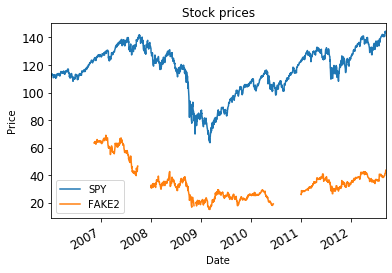

In [6]:
plot_data(df)

We can see that we have some gaps and we'll now fill these gaps

## Forward Filling

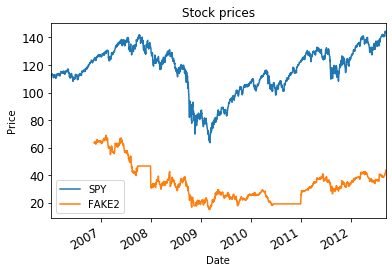

In [8]:
# ffill for Forward filling
df.fillna(method="ffill", inplace=True)
plot_data(df)

## Backward Filling

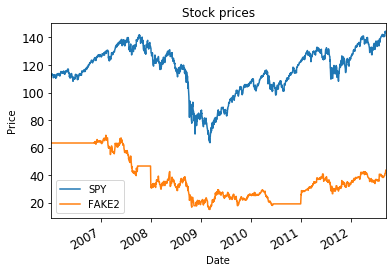

In [10]:
# bfill for backward filling
df.fillna(method="bfill", inplace=True)
plot_data(df)